In [ ]:
from google.colab import files
import zipfile
import io
import os

# Step 1: Upload the dataset ZIP (from local system)
uploaded = files.upload()   # select your cats_dogs.zip

# Step 2: Extract to /content/cats_dogs
zip_path = list(uploaded.keys())[0]   # get uploaded filename
extract_path = "/content/cats_dogs"

with zipfile.ZipFile(io.BytesIO(uploaded[zip_path]), 'r') as zip_ref:
    zip_ref.extractall(extract_path)

print("✅ Dataset unzipped to:", extract_path)

# Step 3: Show folder structure
for root, dirs, files in os.walk(extract_path):
    level = root.replace(extract_path, '').count(os.sep)
    indent = ' ' * 2 * (level)
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 2 * (level + 1)
    for f in files[:5]:  # show only first 5 files per folder
        print(f"{subindent}{f}")


Saving archive (2).zip to archive (2).zip
✅ Dataset unzipped to: /content/cats_dogs
cats_dogs/
  train/
    cats/
      cat_213.jpg
      cat_253.jpg
      cat_506.jpg
      cat_46.jpg
      cat_54.jpg
    dogs/
      dog_451.jpg
      dog_445.jpg
      dog_414.jpg
      dog_216.jpg
      dog_367.jpg
  test/
    cats/
      cat_60.jpg
      cat_525.jpg
      cat_313.jpg
      cat_496.jpg
      cat_140.jpg
    dogs/
      dog_522.jpg
      dog_155.jpg
      dog_142.jpg
      dog_197.jpg
      dog_44.jpg


Using device: cpu
Train samples: 557
Validation samples: 140
Classes: ['cats', 'dogs']
Epoch [1/5], Loss: 0.9346
Epoch [2/5], Loss: 0.6676
Epoch [3/5], Loss: 0.6377
Epoch [4/5], Loss: 0.5656
Epoch [5/5], Loss: 0.4730
✅ Validation Accuracy: 65.00%


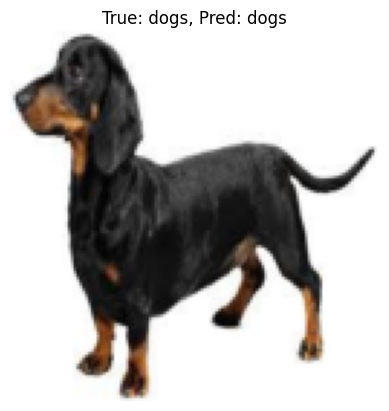

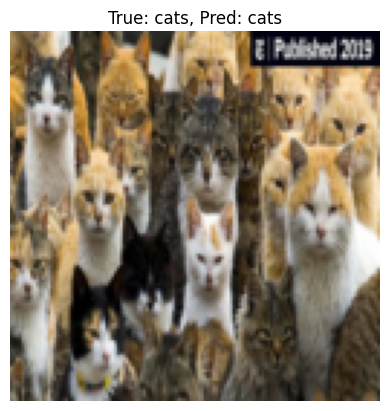

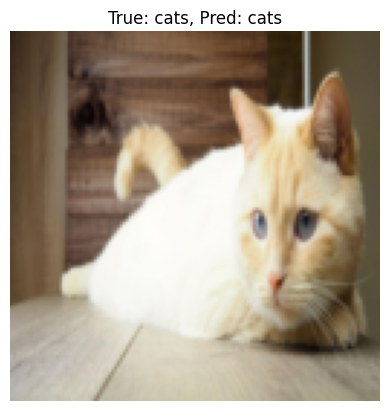

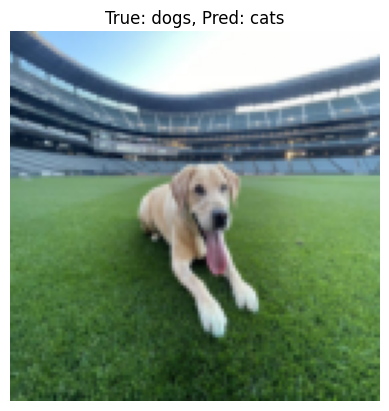

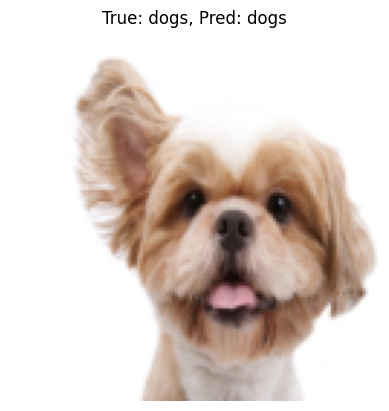

In [ ]:
# -------------------------------------
# 1. Import Libraries
# -------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from google.colab import files
import zipfile, io

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



# -------------------------------------
# 3. Data Preprocessing & Loaders
# -------------------------------------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dir = "/content/cats_dogs/train"
val_dir   = "/content/cats_dogs/test"

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
val_data   = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

print("Train samples:", len(train_data))
print("Validation samples:", len(val_data))
print("Classes:", train_data.classes)

# -------------------------------------
# 4. Define CNN Model
# -------------------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1   =  nn.Linear(64 * 32 * 32, 128)   # 128x128 -> pooled twice -> 32x32
        self.fc2   = nn.Linear(128, 2)              # 2 classes: cat & dog

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)

# -------------------------------------
# 5. Loss & Optimizer
# -------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------------------
# 6. Training Loop
# -------------------------------------
epochs = 5
for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

# -------------------------------------
# 7. Evaluation
# -------------------------------------
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ Validation Accuracy: {100 * correct / total:.2f}%")

# -------------------------------------
# 8. Test on Random Images
# -------------------------------------
classes = train_data.classes

def imshow(img, label, pred):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"True: {label}, Pred: {pred}")
    plt.axis("off")
    plt.show()

# Pick 5 random validation images
for i in range(5):
    img, label = random.choice(val_data)
    model.eval()
    with torch.no_grad():
        output = model(img.unsqueeze(0).to(device))
        _, pred = torch.max(output, 1)
    imshow(img, classes[label], classes[pred.item()])


Using device: cpu
Train samples: 557
Validation samples: 140
Classes: ['cats', 'dogs']
Epoch [1/5], Loss: 0.9186
Epoch [2/5], Loss: 0.6847
Epoch [3/5], Loss: 0.6612
Epoch [4/5], Loss: 0.6093
Epoch [5/5], Loss: 0.5069
✅ Validation Accuracy: 69.29%


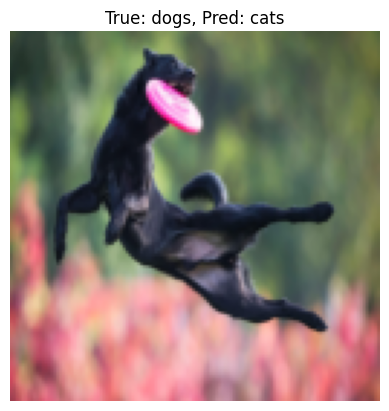

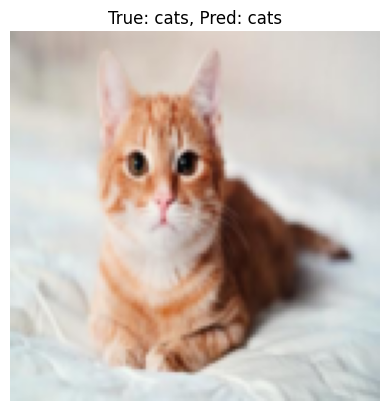

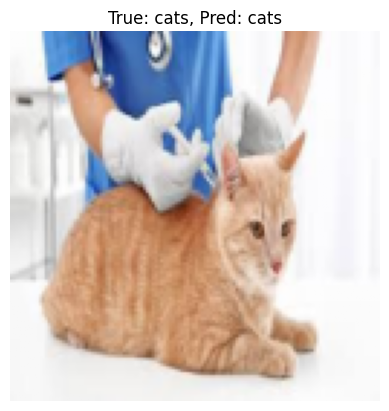

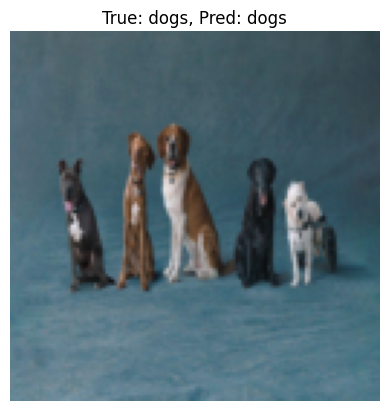

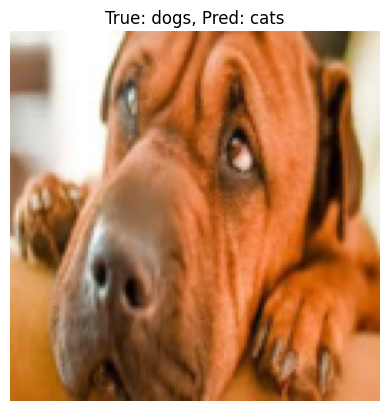

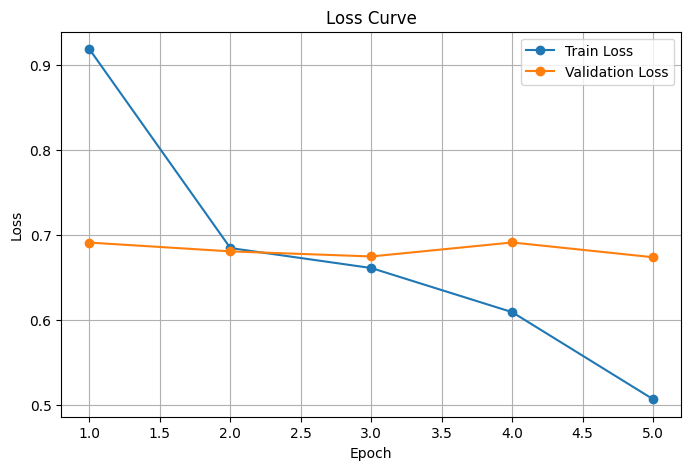

In [ ]:
# -------------------------------------
# 1. Import Libraries
# -------------------------------------
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random
import os
from google.colab import files
import zipfile, io

# Use GPU if available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)



# -------------------------------------
# 3. Data Preprocessing & Loaders
# -------------------------------------
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dir = "/content/cats_dogs/train"
val_dir   = "/content/cats_dogs/test"

train_data = datasets.ImageFolder(root=train_dir, transform=transform)
val_data   = datasets.ImageFolder(root=val_dir, transform=transform)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
val_loader   = DataLoader(val_data, batch_size=32, shuffle=False)

print("Train samples:", len(train_data))
print("Validation samples:", len(val_data))
print("Classes:", train_data.classes)

# -------------------------------------
# 4. Define CNN Model
# -------------------------------------
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(3, 32, kernel_size=3, padding=1)
        self.pool  = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1   =  nn.Linear(64 * 32 * 32, 128)   # 128x128 -> pooled twice -> 32x32
        self.fc2   = nn.Linear(128, 2)              # 2 classes: cat & dog

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 32 * 32)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

model = CNN().to(device)

# -------------------------------------
# 5. Loss & Optimizer
# -------------------------------------
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# -------------------------------------
# 6. Training Loop
# -------------------------------------
epochs = 5
train_losses = []
val_losses = []

for epoch in range(epochs):
    model.train()
    running_loss = 0.0

    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_losses.append(running_loss/len(train_loader))
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {running_loss/len(train_loader):.4f}")

    # -------------------------------------
    # Evaluation during training
    # -------------------------------------
    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for images, labels in val_loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            val_running_loss += loss.item()
    val_losses.append(val_running_loss/len(val_loader))


# -------------------------------------
# 7. Evaluation (After Training)
# -------------------------------------
model.eval()
correct, total = 0, 0
with torch.no_grad():
    for images, labels in val_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"✅ Validation Accuracy: {100 * correct / total:.2f}%")

# -------------------------------------
# 8. Test on Random Images
# -------------------------------------
classes = train_data.classes

def imshow(img, label, pred):
    img = img / 2 + 0.5   # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.title(f"True: {label}, Pred: {pred}")
    plt.axis("off")
    plt.show()

# Pick 5 random validation images
for i in range(5):
    img, label = random.choice(val_data)
    model.eval()
    with torch.no_grad():
        output = model(img.unsqueeze(0).to(device))
        _, pred = torch.max(output, 1)
    imshow(img, classes[label], classes[pred.item()])

# -----------------------------
# 8️⃣ Plot Loss Curve
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(range(1, epochs+1), train_losses, marker='o', label='Train Loss')
plt.plot(range(1, epochs+1), val_losses, marker='o', label='Validation Loss')
plt.title("Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid(True)
plt.show()